# Mental Health Survey in the Tech Industry

<p align="center">
  <img src="https://qz.com/wp-content/uploads/2017/07/david-mao-7091-e1499867773401.jpg?quality=80&strip=all&w=1600"/>
</p>

Mental health is a level of psychological well-being or an absence of mental illness. It is the "psychological state of someone who is functioning at a satisfactory level of emotional and behavioural adjustment"

In this **kernel**, I hope to explore some relevant stats extracted from the **Mental Health Survey - Tech Industry, 2014"**. And since the data was found to be extremely messy & largely categorical in nature so therefore **data cleaning** was an important part of this analysis.


#### Necessary Library Imports & Data Loading

In [26]:
import os
import gc
import warnings
warnings.filterwarnings("ignore")

import re
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud
#matplotlib.rc['font.size'] = 9.0
matplotlib.rc('font', size=20)
matplotlib.rc('axes', titlesize=20)
matplotlib.rc('axes', labelsize=20)
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('legend', fontsize=20)
matplotlib.rc('figure', titlesize=20)
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data/survey_2014.csv')
data.shape

(1259, 27)

#### Let us take a brief look at the data to get an idea - 

In [3]:
data.sample(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
68,2014-08-27 11:52:41,31,Female,United States,NM,No,No,No,NaN,26-100,...,Don't know,Maybe,No,Some of them,No,No,Maybe,Don't know,No,NaN
1102,2014-08-29 21:40:26,33,Female,Canada,NaN,Yes,Yes,Yes,Often,1-5,...,Very difficult,Yes,Yes,No,No,No,Maybe,No,Yes,NaN
749,2014-08-28 11:15:42,19,Male,Canada,NaN,No,No,Yes,Sometimes,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,Yes,Don't know,No,NaN
850,2014-08-28 16:57:49,42,Male,United States,WI,No,No,Yes,Sometimes,1-5,...,Somewhat easy,Maybe,No,No,No,No,Maybe,Don't know,No,NaN
499,2014-08-27 16:29:05,34,Male,Netherlands,NaN,No,No,No,Rarely,6-25,...,Somewhat easy,No,No,Some of them,Some of them,No,Maybe,Yes,No,-
536,2014-08-27 17:49:21,39,M,United States,WI,No,Yes,Yes,Often,26-100,...,Somewhat easy,Yes,No,Some of them,Yes,No,No,No,No,NaN
910,2014-08-28 18:18:43,48,male,Australia,NaN,No,No,Yes,Sometimes,6-25,...,Somewhat easy,Yes,No,Some of them,No,No,Maybe,No,Yes,NaN
440,2014-08-27 15:43:30,26,Male,United Kingdom,NaN,No,Yes,No,Sometimes,6-25,...,Don't know,Maybe,Maybe,No,No,No,Maybe,No,No,NaN
1056,2014-08-29 11:43:12,27,Male,United States,CA,No,No,No,Never,6-25,...,Don't know,Maybe,No,Some of them,Yes,Maybe,Maybe,Don't know,No,NaN
45,2014-08-27 11:43:36,38,Female,United States,TX,No,Yes,Yes,Sometimes,26-100,...,Somewhat easy,No,No,Some of them,Yes,No,No,Yes,No,Our health plan has covered my psychotherapy a...


In [4]:
data.nunique()

Timestamp                    1246
Age                            53
Gender                         49
Country                        48
state                          45
self_employed                   2
family_history                  2
treatment                       2
work_interfere                  4
no_employees                    6
remote_work                     2
tech_company                    2
benefits                        3
care_options                    3
wellness_program                3
seek_help                       3
anonymity                       3
leave                           5
mental_health_consequence       3
phys_health_consequence         3
coworkers                       3
supervisor                      3
mental_health_interview         3
phys_health_interview           3
mental_vs_physical              3
obs_consequence                 2
comments                      160
dtype: int64

**Gender** oddly has 49 unique values & therefore might require some cleaning!

In [5]:
gender_clean = {
    "female":"Female",
    "male":"Male",
    "Male":"Male",
    "male-ish":"Male",
    "maile":"Male",
    "trans-female":"Female",
    "cis female":"Female",
    "f":"Female",
    "m":"Male",
    "M":"Male",
    "something kinda male?":"Male",
    "cis male":"Male",
    "woman":"Female",
    "mal":"Male",
    "male (cis)":"Male",
    "queer/she/they":"Female",
    "non-binary":"Unspecified",
    "femake":"Female",
    "make":"Male",
    "nah":"Unspecified",
    "all":"Unspecified",
    "enby":"Unspecified",
    "fluid":"Unspecified",
    "genderqueer":"Unspecified",
    "androgyne":"Unspecified",
    "agender":"Unspecified",
    "cis-female/femme":"Female",
    "guy (-ish) ^_^":"Male",
    "male leaning androgynous":"Male",
    "man":"Male",
    "male ":"Male",
    "trans woman":"Female",
    "msle":"Male",
    "neuter":"Unspecified",
    "female (trans)":"Female",
    "queer":"Unspecified",
    "female (cis)":"Female",
    "mail":"Male",
    "a little about you":"Unspecified",
    "malr":"Male",
    "p":"Unspecified",
    "femail":"Female",
    "cis man":"Male",
    "ostensibly male, unsure what that really means":"Male",
    "female ":"Female",
    "Female":"Female",
    "Male-ish":"Male"
}

data.Gender = data.Gender.str.lower()
data.Gender = data.Gender.apply(lambda x: gender_clean[x])

## Some basic employment statistics

- Distribution on the basis of **Gender**. (Need more women in tech...surprised,eh?)
- How does the age vary in the professional industry?

/Users/sw/.venv/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


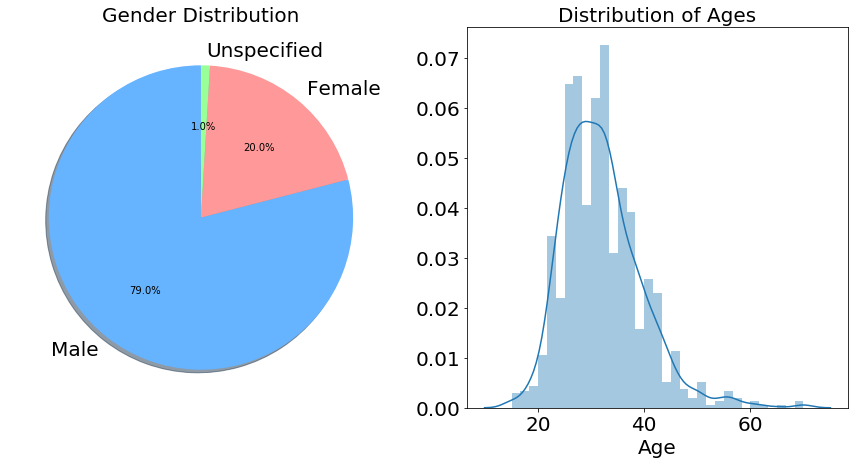

In [6]:
f, ax = plt.subplots(1,2, figsize=(15,7))
ax1 = ax[0].pie(list(data['Gender'].value_counts()), 
                   labels=['Male','Female','Unspecified'],
                  autopct='%1.1f%%', shadow=True, startangle=90,
             colors=['#66b3ff','#ff9999','#99ff99'])
ax[0].set_title("Gender Distribution")
ax[1].set_title("Distribution of Ages")
ax2 = sns.distplot(data.Age.clip(15,70), ax=ax[1])

I thought it would also be interesting to extract other basic stats about **Age** here like *mean, standard dev, quartile values* etc. The average age of an IT employee stands at only **32**, quite surprising!

In [7]:
pd.DataFrame(data.Age.clip(15,60).describe())

,Age
count,1259.000000
mean,32.023828
std,7.374455
min,15.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,60.000000


## Participation in the Survery - by Country

Although, the United States dominates this category it would've been great if developing nations such as **India**, **Russia** & **Israel** had more participants since little is known about the working conditions in these countries & health issues that working professionals from these countries face.

Another thing, due to this extreme domination of the US in this survey, it has kind-of rendered it useless to do a country-wise analysis since there are *<50* participants from a majority of the countries.

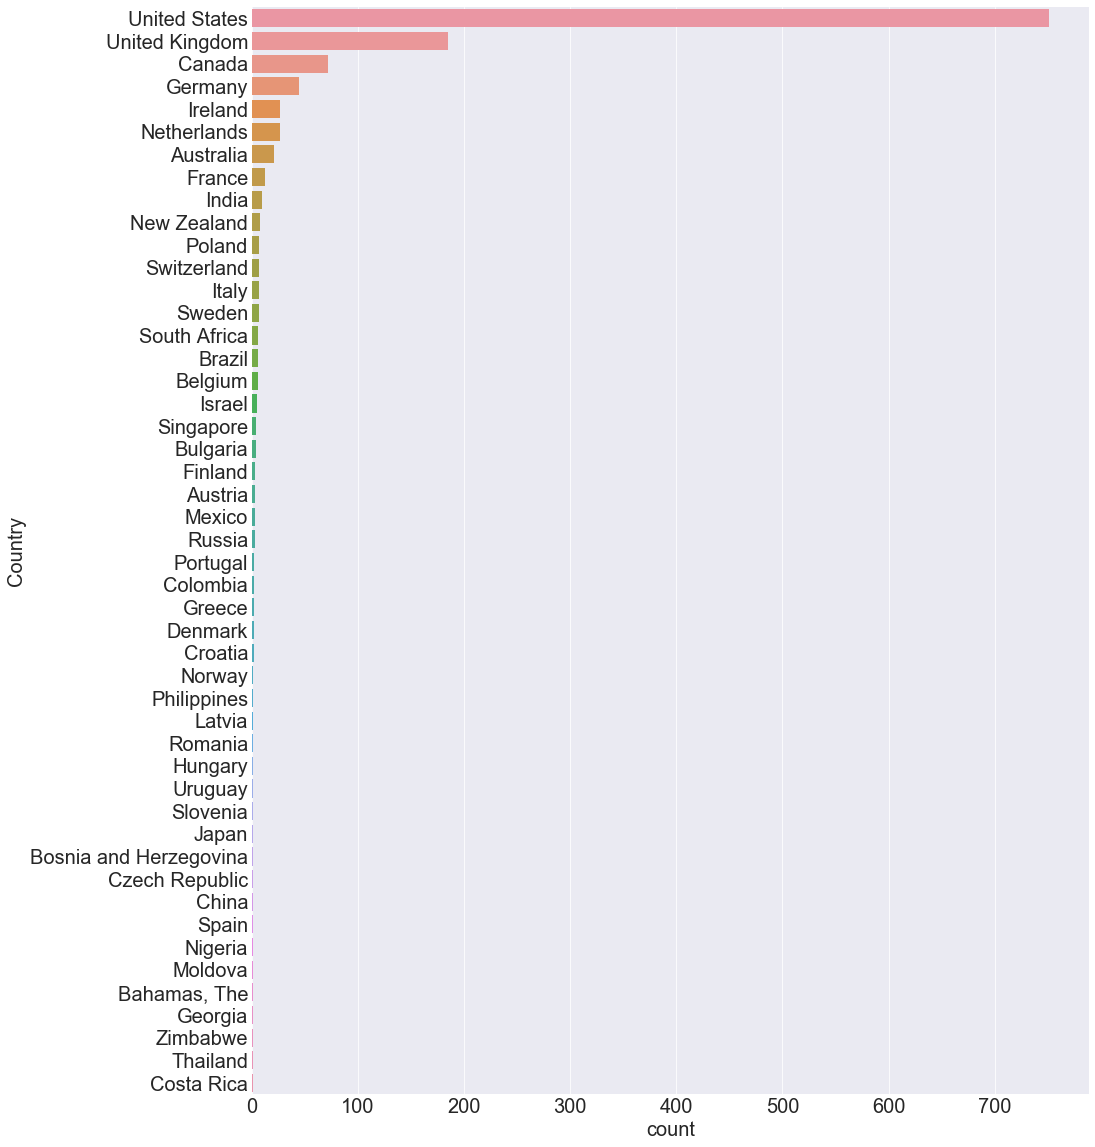

In [8]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,20))
sns.countplot(y='Country', data=data, 
              orient='h', order=data.Country.value_counts().index)
plt.show()

## How big/small is your company?

About 75% of the employees belong to the companies with less than 500 employees deeming them as very small ventures. Quite typical of the tech-industry.

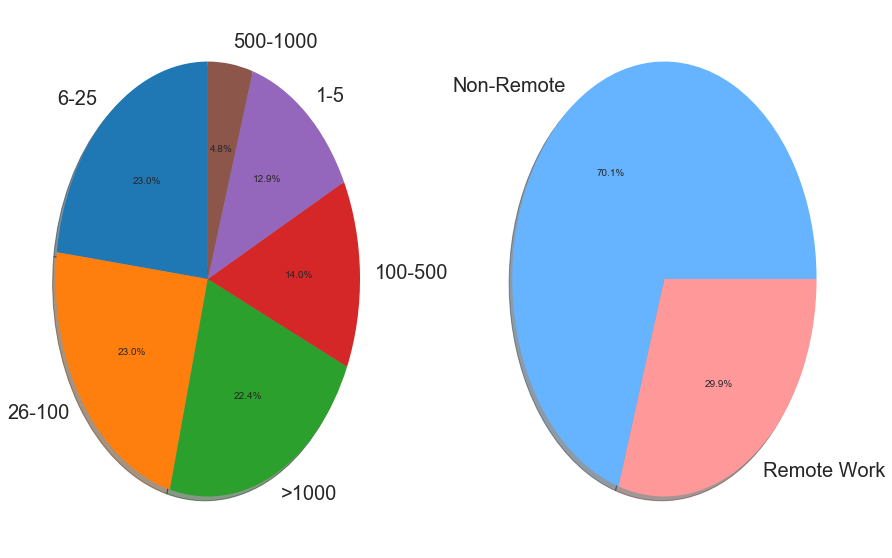

In [9]:
f, ax = plt.subplots(1,2, figsize=(15,10))
patches, texts, autotexts = ax[0].pie(list(data['no_employees'].value_counts()), 
                   labels=['6-25', '26-100', '>1000', '100-500', '1-5', '500-1000'],
                  autopct='%1.1f%%', shadow=True, startangle=90)
new = ax[1].pie(list(data['remote_work'].value_counts()),
                                     labels=['Non-Remote', 'Remote Work'],
                                     autopct='%1.1f%%', shadow=True, startangle=0,colors=['#66b3ff','#ff9999'])

## How easy/difficult is it to take a leave?

This one caught me by surprise. Nearly *40%* of the total respondents are unsure about their company's policies on taking leaves. The trend is consistent quite consistent in Tech-NonTech companies, and with both Males & Females.

Text(0,0.5,'# Reponses')

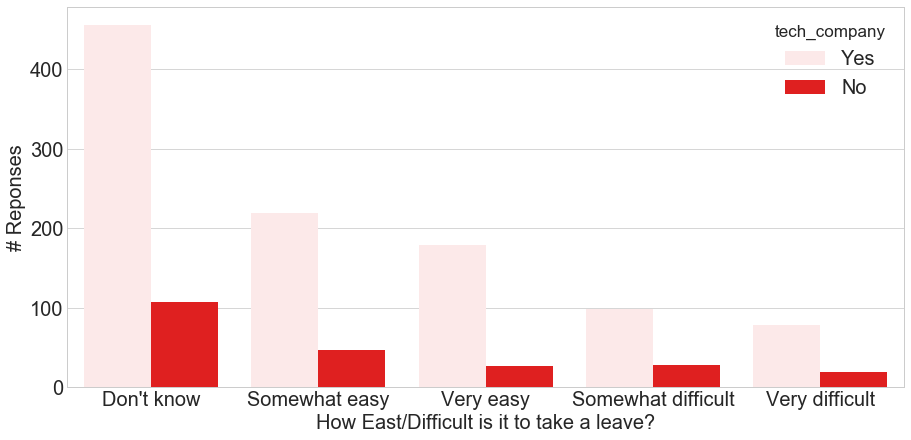

In [10]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
sns.countplot(x='leave', data=data, order=data.leave.value_counts().index, 
              hue='tech_company', color='r')
plt.xlabel("How East/Difficult is it to take a leave?")
plt.ylabel("# Reponses")

# Let's explore some Company Policies & their correlation

I'm taking the following columnar attributes as an indicator of the company policies towards their employees (all of them take binary values i.e. Yes/No) --

1. Treatment 
2. Benefits 
3. Care Options
4. Wellness Program (whether it exists or not)

Since all of these are categorical in nature, in order to calculate their correlation, we must **factorize** them to convert them to numeric. `pd.factorize` of Pandas comes in handy to this cause.

In [11]:
company_characs = [
    "treatment",
    "benefits",
    "care_options",
    "wellness_program",
]

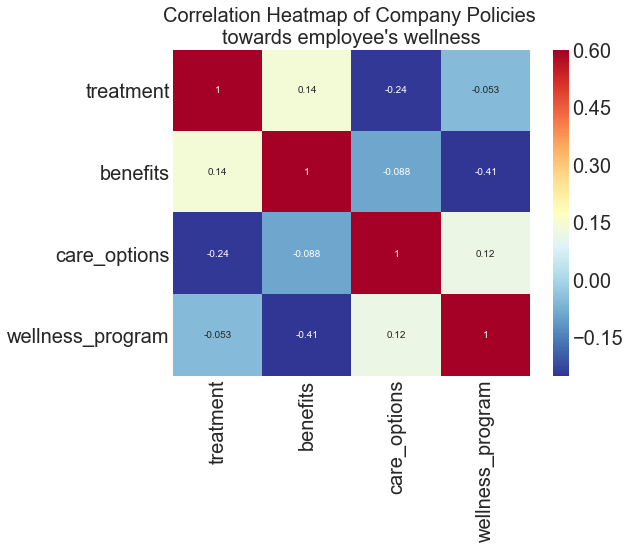

In [12]:
sns.set_style("darkgrid")
company_chars_corr = data[company_characs].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', 
                                                                            min_periods=1)
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(company_chars_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap of Company Policies \ntowards employee's wellness");

# Well Being Indicators

There are also certain binary attributes in this dataset that help describe the state of well being of an individual, namely -- 

1. Seeking Help 
2. Mental Health Consequences (due to job)
3. Physical Health Consequences (due to job)
4. Observed Consequences
5. Mental Health Interview

All of these are also categorical in nature so we simply factorize them as before.

In [13]:
wellbeing_indicators = [
    'seek_help',
    'mental_health_consequence',
    'obs_consequence',
    'mental_health_interview',
    'phys_health_consequence'
]

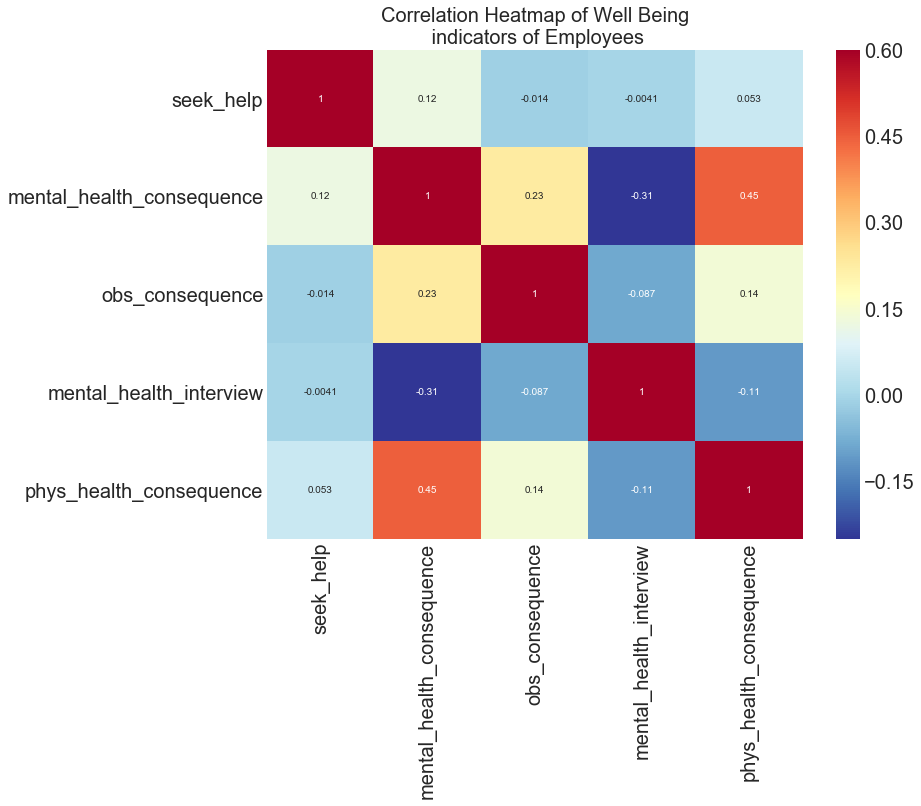

In [14]:
wellbeing_indicators_corr = data[wellbeing_indicators].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', 
                                                                            min_periods=1)
plt.figure(figsize = (12, 9))

# Heatmap of correlations
sns.heatmap(wellbeing_indicators_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap of Well Being\n indicators of Employees");

# How do company policies relate to their employee's well-being?

Here, we simple put together the features indicating company policies with those indicating the overall well-being of the employee. The results are also quite interesting, if you look closely

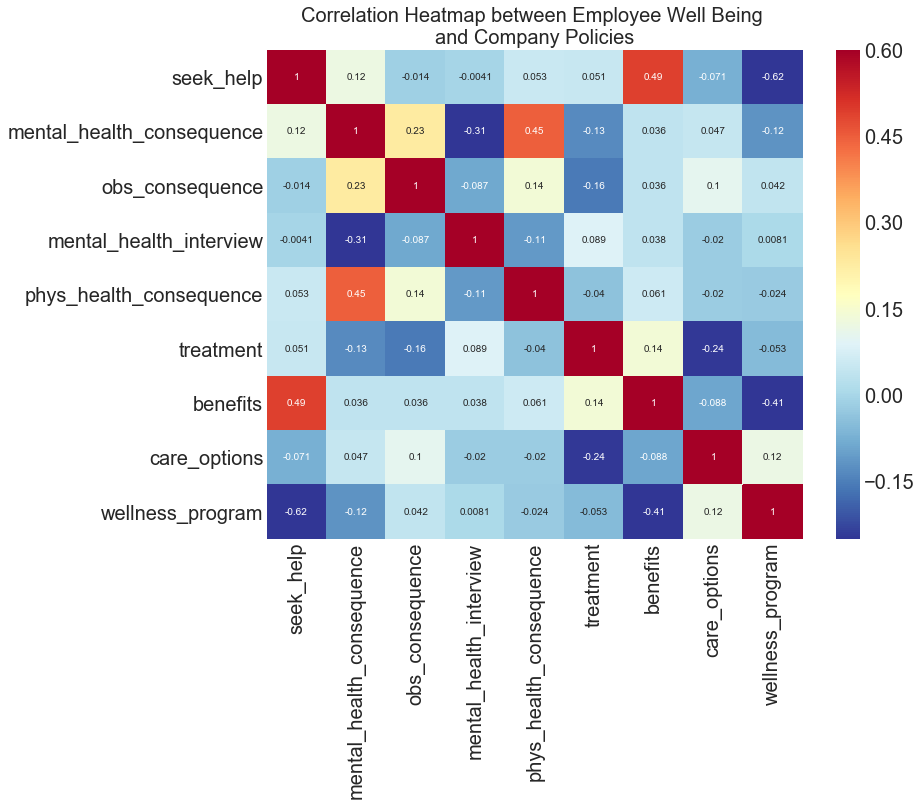

In [15]:
wellbeing_policy_corr = data[wellbeing_indicators + company_characs].apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', 
                                                                            min_periods=1)
plt.figure(figsize = (12, 9))

# Heatmap of correlations
sns.heatmap(wellbeing_policy_corr, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title("Correlation Heatmap between Employee Well Being \nand Company Policies");

# A (Powerful) Wordcloud

A word cloud of what the employees have to say in regard to this issue of Mental Health!

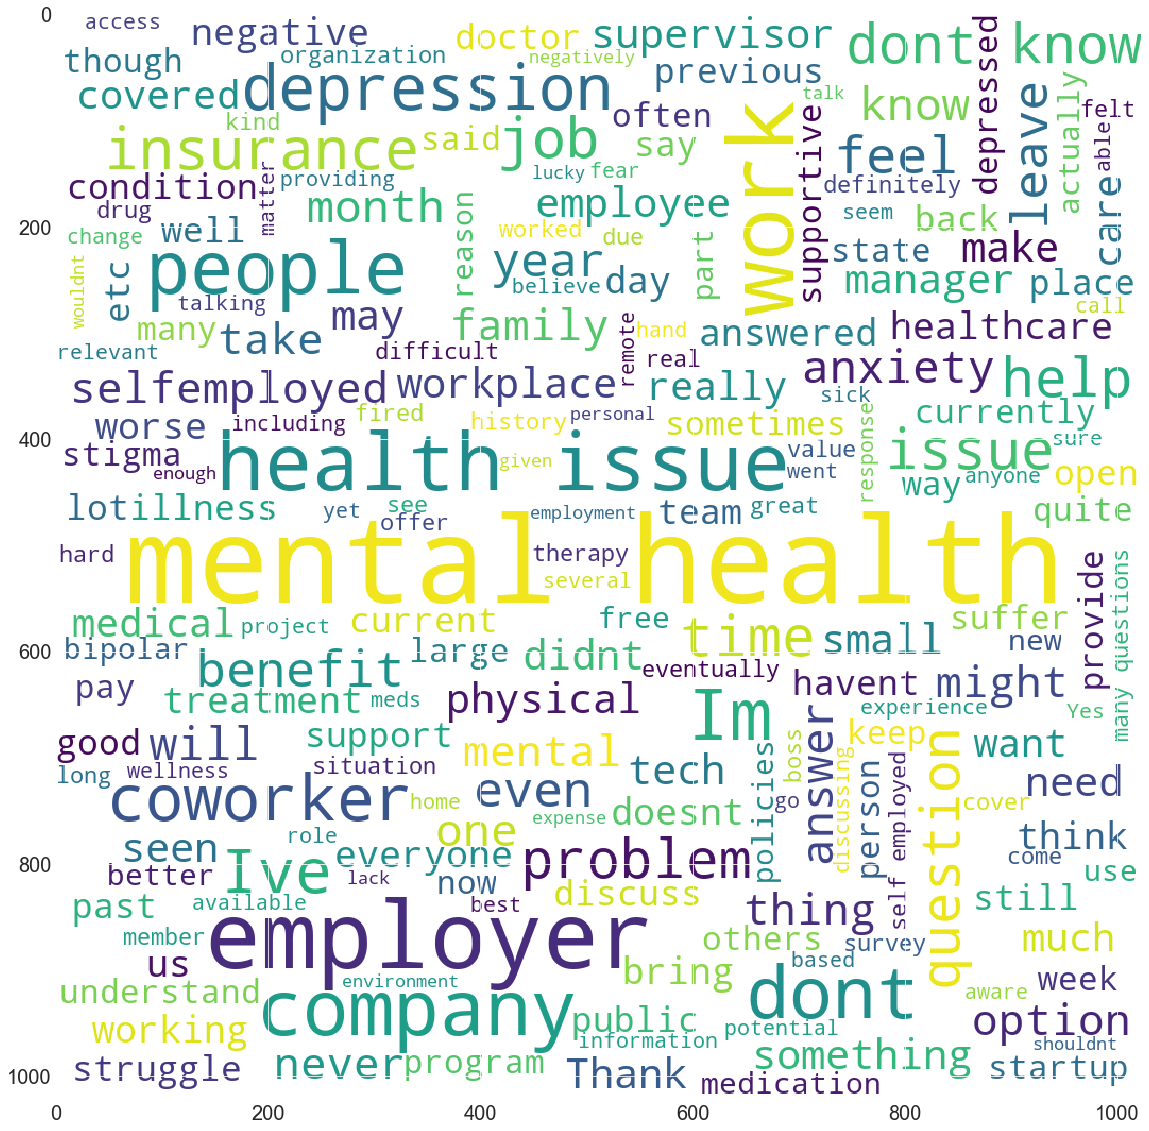

In [30]:
plt.figure(figsize=(20,20))
wordcloud = WordCloud(
                          background_color='white',
                          width=1024,
                          height=1024,
                         ).generate(re.sub(r'[^\w\s]',''," ".join(list(data.comments.unique()[1:]))))
plt.imshow(wordcloud)

### That'd be all for now, I'll continue adding some more visuals as I explore this data. 
 
**Let me know what you guys think in the comments below!**